Dados: Empresa que trabalha com produtos de limpezas e higiene, e os produtos precisam passar por uma checagem regular, para verificar se eles estão dentro dos padrões para serem comercializados.Um amaciante e uma caixa de sabão em pó. Analisaremos os dados conforme suas medidas e verificando se elas seguem algumas métricas das medidas de tendência central (média, mediana e moda).

In [20]:
import pandas as pd
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv")
vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


In [21]:
# Verificando a estatística descritiva das amostras de volume em forma de tabela
vol_amaciante.describe()

,Volume
count,1000.00000
mean,999.98970
std,0.48553
min,998.30000
25%,999.70000
50%,1000.00000
75%,1000.30000
max,1001.50000


**Como estão distribuídos os dados dos volumes da amostra do amaciante? Qual seria o seu valor central (média e mediana)?**

**Como estão distribuídos os dados dos volumes do amaciante de acordo com a mediana e os quartis? Possuo dados discrepantes?**

In [22]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

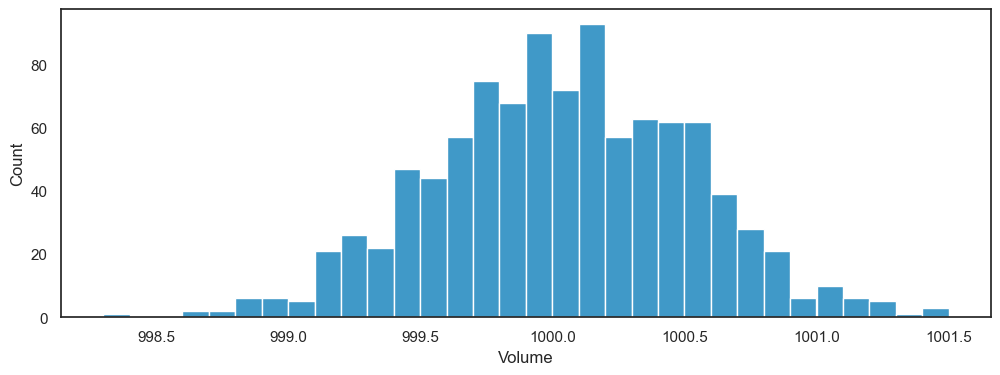

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (12,4))
sns.set_theme(style='white')

ax= sns.histplot(data= vol_amaciante, x= "Volume", binwidth=0.1, color= AZUL2)

plt.show()

Por que usar um histograma de colunas e de linhas para esses tipo de dados?

Quando desejamos saber a distribuição dos volumes, trabalhamos com uma variável de interesse (os volumes apenas)

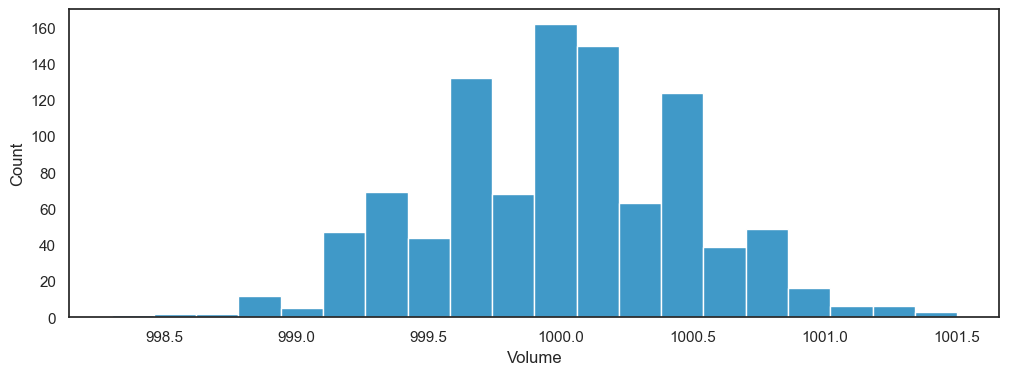

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (12,4))
sns.set_theme(style='white')

ax= sns.histplot(data= vol_amaciante, x= "Volume", bins=20, color= AZUL2) #ao inves de passar largura vai a quantidade de bins quantidade de colunas

plt.show()

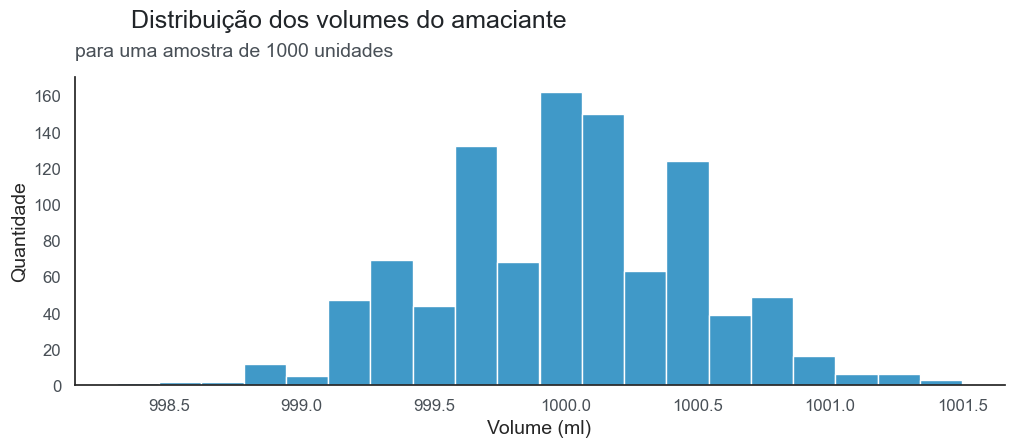

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize= (12,4))
sns.set_theme(style='white')
# Gerando o histograma sem estimativa de densidade
ax= sns.histplot(data= vol_amaciante, x= "Volume", bins=20, color= AZUL2) #ao inves de passar largura vai a quantidade de bins quantidade de colunas
# Personalizando o gráfico
plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Volume (ml)', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

plt.show()

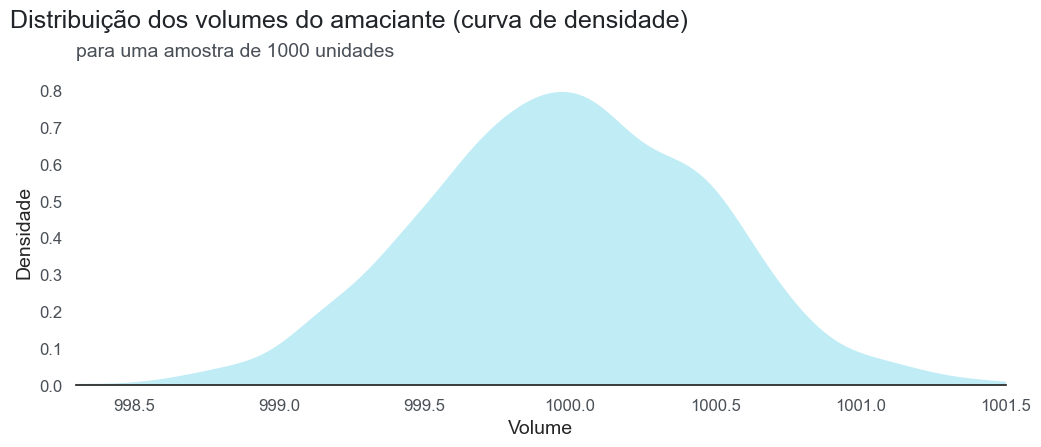

In [48]:
# Gráfico de densidade: Distribuição de uma variável para grandes volumes de dados
def grafico_densidade():
    # Importando as bibliotecas
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Criando a figura e os eixos
    fig, ax = plt.subplots(figsize=(12, 4))
    # Configurando o estilo do Seaborn
    sns.set_theme(style='white')    
    # Criando o gráfico de densidade no eixo existente
    sns.kdeplot(data=vol_amaciante, x="Volume", color=AZUL3, lw=0, fill=True, ax=ax)
    # Personalizando o gráfico
    plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', 
                 size=18, color=CINZA1, ha='right', x=0.635, y=1.05)
    plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad=15, loc="left")
    ax.set_xlabel('Volume', fontsize=14)
    ax.set_ylabel('Densidade', fontsize=14)
    ax.xaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.yaxis.set_tick_params(labelsize=12, labelcolor=CINZA2)
    ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
    # Removendo o eixo da esquerda
    sns.despine(left=True)
    # Retornando o objeto ax para personalizações futuras
    return ax
grafico_densidade();


Passando media mediana e moda ao grafico e traçando linhas

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

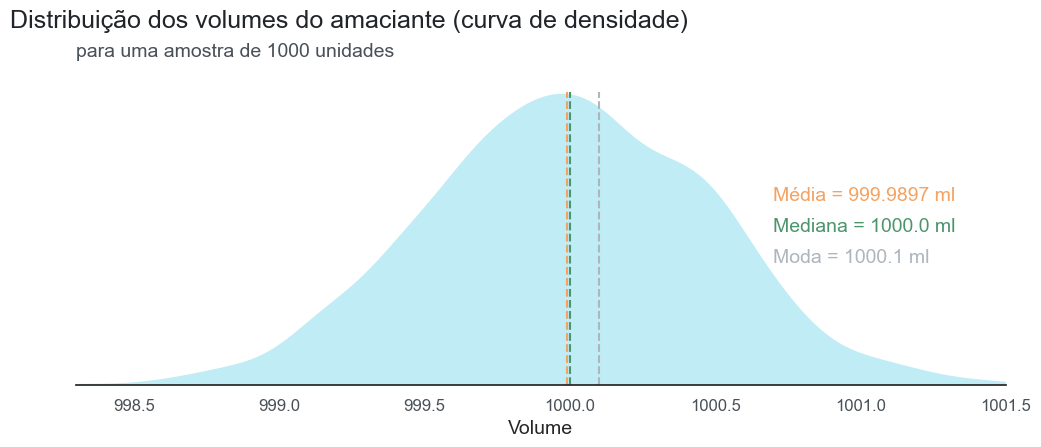

In [52]:
# Chamando a função
ax = grafico_densidade()

# Personalizando o gráfico após a criação
ax.set_ylabel('')
ax.set_yticklabels([])
estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ["Média", "Mediana", "Moda"]
cores = [LARANJA1, VERDE1, CINZA3]

# Adicionando linhas verticais no gráfico
ax.vlines(x=estat, ymin=0, ymax=0.8, colors=cores, linestyles="--")
# Anotando os valores de média, mediana e moda no gráfico
for i in range(len(estat)):
  ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} ml', fontsize=14, color = cores[i], transform=ax.transAxes)
plt.show()

In [ ]:
from matplotlib.patches import Ellipse #Para sinalizar dados descrepantes
import seaborn as sns

c:\Users\Cr0l3y\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


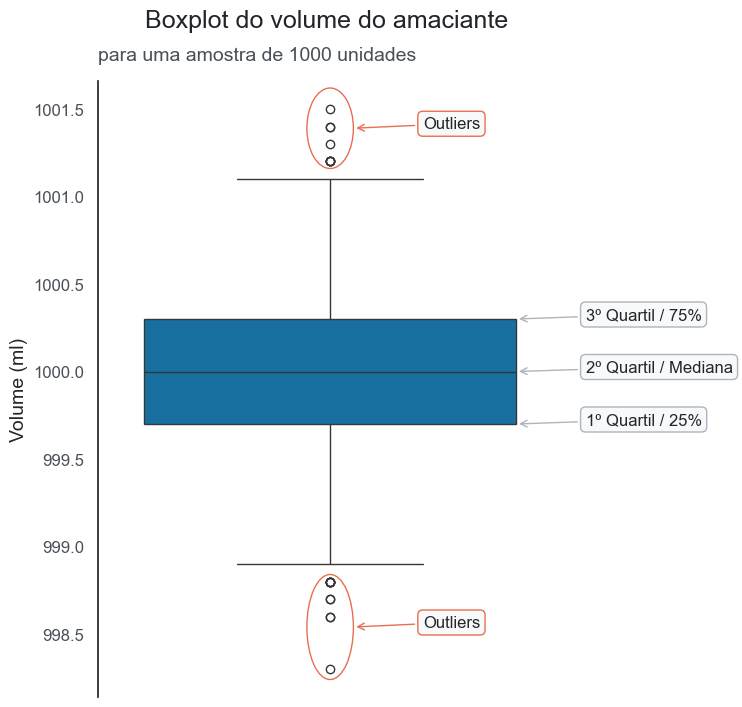

In [62]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")
sns.boxplot(data=vol_amaciante, y="Volume", orient="v", color=AZUL2, ax=ax);
## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)
# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color=VERMELHO1, fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color=VERMELHO1, fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)
# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))            # propriedades da seta arrowprops
ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=VERMELHO1),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=VERMELHO1))

ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))
plt.show()

boxplot é ideal para passar valores de muitos dados. Também passa valores de 5 dados principais: limite superior, primeiro quartil, segundo quartil (ou mediana), terceiro quartil e limite superior

Quartis: dividem os dados ordenados em quatro partes iguais. O primeiro quartil (Q1) representa o valor abaixo do qual está 25% dos dados, o segundo quartil (Q2) representa a mediana, ou seja, o valor que divide os dados em duas partes iguais (50%), e o terceiro quartil (Q3) representa o valor abaixo do qual está 75% dos dados.

Intervalo interquartil: representado no desenho do boxplot como a caixa, o intervalo interquartil é a subtração entre o valor do terceiro quartil (Q3) pelo primeiro quartil (Q1). Ele representa a amplitude dos dados centrais, onde fica concentrada a metade dos valores. Para calculá-lo por meio da linguagem Python a partir de uma coluna de dados.

Limites máximo e mínimo: definem a faixa dos valores considerados “normais” ou “não-discrepantes”. São basicamente utilizados para identificar outliers. Geralmente, adota-se uma boa prática de determinar os limites por meio da soma, no caso do limite superior, ou subtração, no caso do limite inferior, do produto de 1,5 pelo intervalo interquartil (IIQ). Os valores fora desses dois limites são considerados outliers. Para calculá-lo por meio da linguagem Python a partir de uma coluna de dados.


In [66]:
IIQ = vol_amaciante["Volume"].quantile(0.75) - vol_amaciante["Volume"].quantile(0.25)
IIQ 

0.599999999999909

In [67]:
limite_superior = vol_amaciante["Volume"].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante["Volume"].quantile(0.25) - 1.5 * IIQ
print(f"Limite superior = {limite_superior}", f"\nLimite inferior = {limite_inferior}")

Limite superior = 1001.1999999999998 
Limite inferior = 998.8000000000002
